In [3]:
# autoreload
%load_ext autoreload
%autoreload 2

In [4]:
import torch
import torchvision.transforms as transforms
from datasets.TrainDataset import TrainDataset
import matplotlib.pyplot as plt

In [5]:
# select checkpoint
MODEL = 'models/unet-v1.pt'

In [6]:
# load checkpoint
checkpoint = torch.load(MODEL)
# create model
model = torch.hub.load('milesial/Pytorch-UNet', 'unet_carvana', pretrained=False, scale=0.5)
# model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet', in_channels=3, out_channels=1, init_features=32, pretrained=False)
# load model weights
model.load_state_dict(checkpoint)

Using cache found in /home/nadezhda/.cache/torch/hub/milesial_Pytorch-UNet_master


<All keys matched successfully>

In [7]:
# paths to image and ground truth folders
image_folder = 'datasets/train/images/'
gt_folder = 'datasets/train/groundtruth/'

# define data transformation
transform = transforms.Compose([
    transforms.Resize((400, 400)), # crashes with 400 x 400
    transforms.ToTensor(), 
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# create an instance of custom dataset class
dataset = TrainDataset(image_folder, gt_folder, transform=transform)

torch.Size([1, 2, 400, 400])


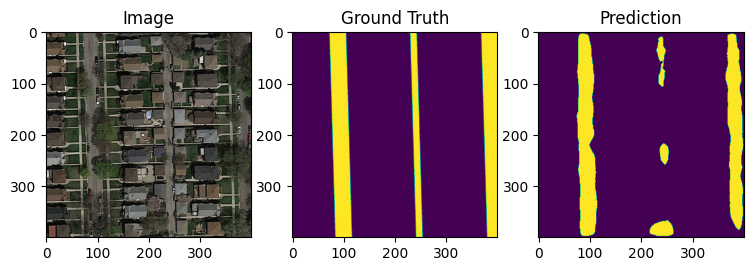

torch.Size([1, 2, 400, 400])


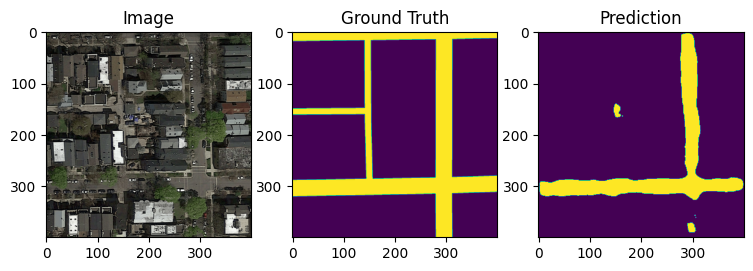

torch.Size([1, 2, 400, 400])


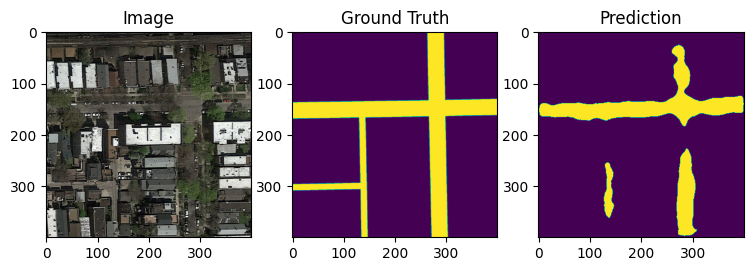

torch.Size([1, 2, 400, 400])


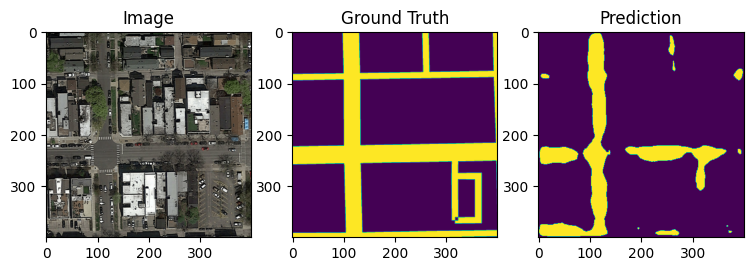

torch.Size([1, 2, 400, 400])


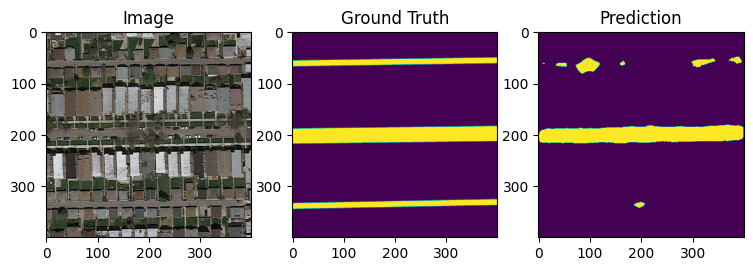

torch.Size([1, 2, 400, 400])


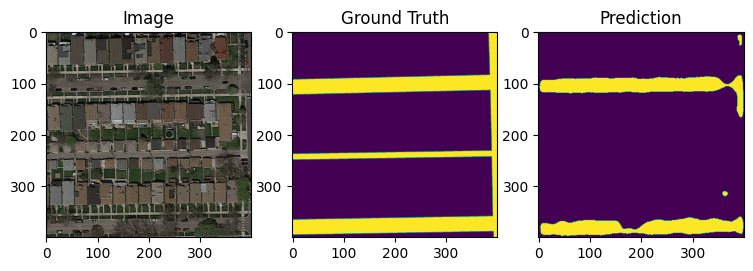

torch.Size([1, 2, 400, 400])


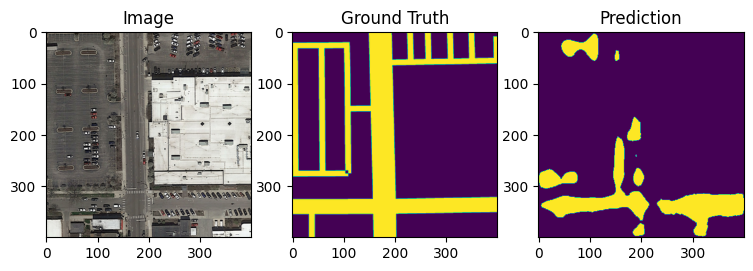

torch.Size([1, 2, 400, 400])


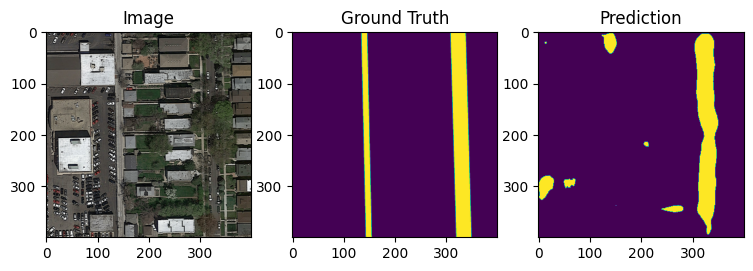

torch.Size([1, 2, 400, 400])


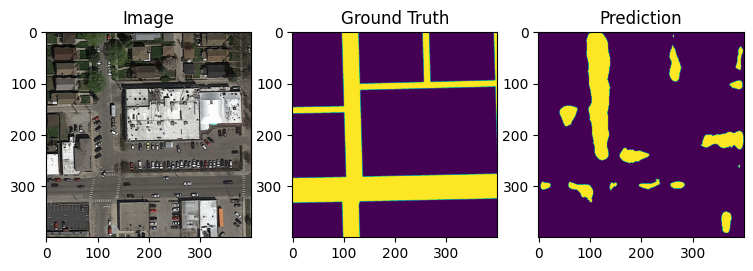

torch.Size([1, 2, 400, 400])


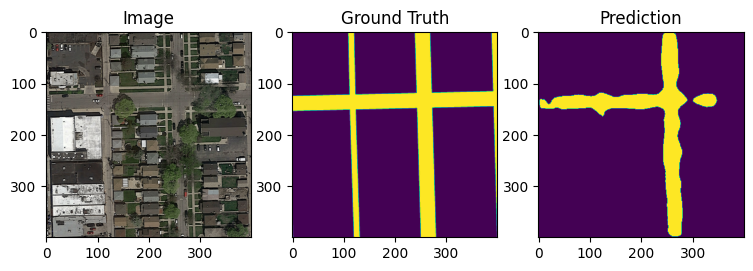

In [11]:
for K in range(10):
    # get image and ground truth
    image = dataset[K][0]
    gt = dataset[K][1]
    # predict
    pred = model(image.unsqueeze(0))
    print(pred.shape)
    # convert to numpy array
    image = image.numpy().transpose(1, 2, 0)
    gt = gt.numpy().squeeze(0)

    # for mateuszbuda [1, 1, 400, 400]
    # pred = pred.detach().numpy().squeeze(0).squeeze(0)

    # for milesial [1, 2, 400, 400]
    pred = pred[:, [0], :, :]
    pred = pred.detach().numpy().squeeze(0).squeeze(0)
    
    # threshold
    pred[pred <= 0.5] = 0
    pred[pred > 0.5] = 1
    # plot
    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    ax[0].imshow(image)
    ax[0].set_title('Image')
    ax[1].imshow(gt)
    ax[1].set_title('Ground Truth')
    ax[2].imshow(pred)
    ax[2].set_title('Prediction')
    plt.show()